# Data Initialization

In [14]:
# import libraries for data management
import numpy as np 
import pandas as pd
from sklearn import preprocessing

# import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(18,6))

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

<Figure size 1296x432 with 0 Axes>

In [15]:
#load dataset

data_raw = pd.read_csv('Dataset - Loans2_Cleansed.csv')

In [16]:
data_raw.head()

,Period,quick_ratio,profit_growth,management_turnover,loan_size,leverage_ratio,defaulted,sector,Environment,Social,Governance
0,1,0.29,-0.18,0.11,53.06,0.70,1,1,0.028130,0.209371,-0.719051
1,1,2.07,0.44,0.38,403.37,0.21,0,1,0.156548,0.042234,-0.854891
2,1,0.18,-0.09,0.25,106.22,0.83,1,1,-0.426099,0.384244,0.108842
3,1,0.34,0.19,0.10,452.29,0.36,1,1,-0.221770,0.299328,0.087536
4,1,0.65,0.20,0.18,441.16,0.49,0,1,-0.244648,-1.993649,-0.548874


In [17]:
# remove ESG columns

data = data_raw.drop(columns=['sector','Environment','Social','Governance'])

In [18]:
data.head()

,Period,quick_ratio,profit_growth,management_turnover,loan_size,leverage_ratio,defaulted
0,1,0.29,-0.18,0.11,53.06,0.70,1
1,1,2.07,0.44,0.38,403.37,0.21,0
2,1,0.18,-0.09,0.25,106.22,0.83,1
3,1,0.34,0.19,0.10,452.29,0.36,1
4,1,0.65,0.20,0.18,441.16,0.49,0


# Machine Learning (Decision Tree)

In [19]:
# import libraries for machine learning (decision tree)
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text

In [20]:
# X and Y split

X = data.drop(['defaulted'],axis='columns',inplace=False)
Y = data['defaulted']

In [25]:
# Test and Train Set Split (train = 70% / test = 30%)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

### baseline

In [26]:
# Default Model (Baseline)

model = tree.DecisionTreeClassifier()
model = model.fit(train_x,train_y)
pred_y = model.predict(test_x)
pred_prob_y = model.predict_proba(test_x)

In [27]:
# Evaluation

print("MAE:",mean_absolute_error(test_y, pred_y))
print("Accuracy:",accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y, pred_y))
print("Confusion Matrix:", '\n', confusion_matrix(test_y, pred_y))

MAE: 0.34833333333333333
Accuracy: 0.6516666666666666
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.61      0.63       296
           1       0.65      0.69      0.67       304

    accuracy                           0.65       600
   macro avg       0.65      0.65      0.65       600
weighted avg       0.65      0.65      0.65       600

Confusion Matrix: 
 [[180 116]
 [ 93 211]]


### overfitting check

In [41]:
# check for overfitting (max_leaf_nodes)

nodes = [2,3,4,5,6,7,8,9,10,15,20,30]
error_train = []
error_test = []

for i in nodes:
    # 70% train data
    model = tree.DecisionTreeClassifier(max_leaf_nodes = i)
    model = model.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)   
    error_train.append(1-accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None))

    # 30% test data
    pred_y = model.predict(test_x)
    error_test.append(1-accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))

print("Training Set Min Error Rate:","{:.3%}".format(min(error_train)),"at nodes:",nodes[error_train.index(min(error_train))])
print("Testing Set Error Rate:","{:.3%}".format(min(error_test)),"at nodes:",nodes[error_test.index(min(error_test))])

Training Set Min Error Rate: 21.857% at nodes: 30
Testing Set Error Rate: 25.667% at nodes: 10


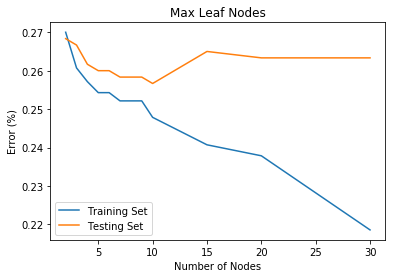

In [42]:
# range for cvgrid for leaf nodes [10]

plt.title('Max Leaf Nodes')
plt.plot(nodes,error_train, label='Training Set')
plt.plot(nodes,error_test, label='Testing Set')
plt.xlabel('Number of Nodes')
plt.ylabel('Error (%)')
plt.legend()

In [50]:
# check for overfitting (depth)

depths = [*range(1,21)]
error_train = []
error_test = []

for i in depths:
    # 70% train data
    model = tree.DecisionTreeClassifier(max_depth = i)
    model = model.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)   
    error_train.append(1-accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None))

    # 30% test data
    pred_y = model.predict(test_x)
    error_test.append(1-accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))

print("Training Set Min Error Rate:","{:.3%}".format(min(error_train)),"at depths:",depths[error_train.index(min(error_train))])
print("Testing Set Error Rate:","{:.3%}".format(min(error_test)),"at depths:",depths[error_test.index(min(error_test))])

Training Set Min Error Rate: 3.929% at depths: 20
Testing Set Error Rate: 25.667% at depths: 9


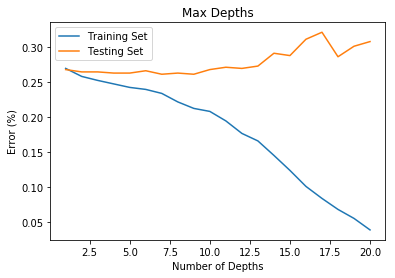

In [44]:
# range for cvgrid for max depths [7-9]

plt.title('Max Depths')
plt.plot(depths,error_train, label='Training Set')
plt.plot(depths,error_test, label='Testing Set')
plt.xlabel('Number of Depths')
plt.ylabel('Error (%)')
plt.legend()

In [59]:
# check for overfitting (min sample split)

split = [*range(2,11)]
error_train = []
error_test = []

for i in split:
    # 70% train data
    model = tree.DecisionTreeClassifier(min_samples_split = i)
    model = model.fit(train_x,train_y)
    pred_y_train = model.predict(train_x)   
    error_train.append(1-accuracy_score(train_y, pred_y_train, normalize=True, sample_weight=None))

    # 30% test data
    pred_y = model.predict(test_x)
    error_test.append(1-accuracy_score(test_y, pred_y, normalize=True, sample_weight=None))

print("Training Set Min Error Rate:","{:.3%}".format(min(error_train)),"at samples:",split[error_train.index(min(error_train))])
print("Testing Set Error Rate:","{:.3%}".format(min(error_test)),"at samples:",split[error_test.index(min(error_test))])

Training Set Min Error Rate: 0.000% at samples: 2
Testing Set Error Rate: 30.833% at samples: 7


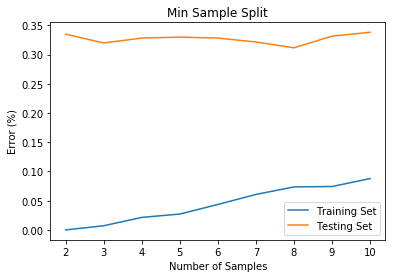

In [52]:
# range for cvgrid for min sample split [6-8]

plt.title('Min Sample Split')
plt.plot(split,error_train, label='Training Set')
plt.plot(split,error_test, label='Testing Set')
plt.xlabel('Number of Samples')
plt.ylabel('Error (%)')
plt.legend()

### grid cv

In [60]:
# define criterion

crit = ['gini','entropy']

# define max depths

depths = np.arange(7,9)

# define max leaf nodes

num_leafs = [10]

# define the min sample split

split = [6,7,8]

# initiate grid

try_grid = [{'criterion':crit,
            'max_depth':depths,
            'max_leaf_nodes':num_leafs,
            'min_samples_split':split,
            }]

try_grid

[{'criterion': ['gini', 'entropy'],
  'max_depth': array([7, 8]),
  'max_leaf_nodes': [10],
  'min_samples_split': [6, 7, 8]}]

In [61]:
# DT_model = GridSearchCV(tree.DecisionTreeClassifier(criterion = 'entropy'), param_grid=try_grid, cv=10)

DT_model = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=try_grid, cv=10)

In [62]:
# fit the model with a combination of the parameters, this will take a while to run

DT_model.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': array([7, 8]), 'max_leaf_nodes': [10],
                          'min_samples_split': [6, 7, 8]}])

In [63]:
# find the best parameters

DT_model.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_leaf_nodes': 10,
 'min_samples_split': 7}

In [64]:
DT_model.best_score_

0.74

In [65]:
# pick the best model

DT_model_best = tree.DecisionTreeClassifier(criterion = 'entropy',
                                            max_depth = 7, 
                                            max_leaf_nodes = 10,
                                            min_samples_split = 7,
                                            )

DT_model_best.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=10,
                       min_samples_split=7)

In [66]:
pred_y_2 = DT_model_best.predict(test_x)
pred_prob_y_2 = DT_model_best.predict_proba(test_x)

## Evaluation

In [67]:
# evaluate result

print("MAE:",mean_absolute_error(test_y, pred_y_2))
print("Accuracy:",accuracy_score(test_y, pred_y_2, normalize=True, sample_weight=None))
print("Classification Report:",'\n',classification_report(test_y, pred_y_2))
print("Confusion Matrix:", '\n', confusion_matrix(test_y, pred_y_2))

MAE: 0.25333333333333335
Accuracy: 0.7466666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.98      0.79       296
           1       0.96      0.52      0.68       304

    accuracy                           0.75       600
   macro avg       0.81      0.75      0.73       600
weighted avg       0.81      0.75      0.73       600

Confusion Matrix: 
 [[289   7]
 [145 159]]


In [68]:
text_representation = tree.export_text(DT_model_best)
print(text_representation)

|--- feature_1 <= 0.37
|   |--- feature_2 <= 0.13
|   |   |--- feature_4 <= 301.52
|   |   |   |--- feature_5 <= 0.33
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  0.33
|   |   |   |   |--- feature_2 <= -0.30
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  -0.30
|   |   |   |   |   |--- feature_5 <= 0.56
|   |   |   |   |   |   |--- feature_2 <= -0.04
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  -0.04
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  0.56
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_4 >  301.52
|   |   |   |--- class: 0
|   |--- feature_2 >  0.13
|   |   |--- feature_1 <= 0.04
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.04
|   |   |   |--- class: 0
|--- feature_1 >  0.37
|   |--- feature_2 <= 1.00
|   |   |--- class: 0
|   |--- feature_2 >  1.00
|   |   |--- class: 1



In [69]:
# Feature 7, 4, 12 are the most informative features according to the decision tree text representation.

print('The most informative features are {}, {} and {}'.format(train_x.columns[1], train_x.columns[2],train_x.columns[4]))

The most informative features are quick_ratio, profit_growth and loan_size


### Precision-Recall Curve

In [70]:
# array the test_y

test_y_array = np.array(test_y)

In [71]:
# precision-recall curve

precision1, recall1, threshold1 = precision_recall_curve(test_y_array, pred_prob_y[:,1])
precision2, recall2, threshold2 = precision_recall_curve(test_y_array, pred_prob_y_2[:,1])

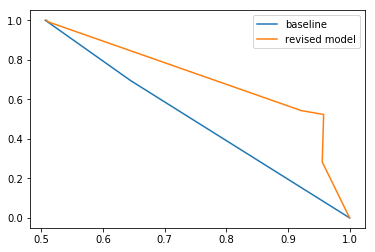

In [72]:
plt.plot(precision1,recall1, label='baseline') #baseline
plt.plot(precision2,recall2, label='revised model') #cvgrid new model
plt.legend()

### ROC / AUC

In [73]:
# ROC

fpr1, tpr1, threshold3 = metrics.roc_curve(test_y_array, pred_prob_y[:,1],pos_label=1)
fpr2, tpr2, threshold4 = metrics.roc_curve(test_y_array, pred_prob_y_2[:,1],pos_label=1)

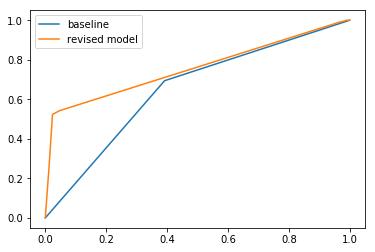

In [74]:
plt.plot(fpr1,tpr1, label='baseline') #baseline
plt.plot(fpr2,tpr2, label='revised model') #cvgrid new model
plt.legend()

In [75]:
# AUC - baseline

metrics.auc(fpr1, tpr1)

0.6510935277382646

In [76]:
# AUC - revised model

metrics.auc(fpr2, tpr2)

0.7565622777382646

# Data Interpretation

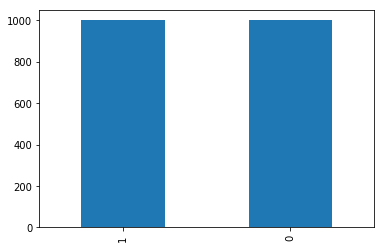

In [77]:
ax=data['defaulted'].value_counts().plot(kind='bar')

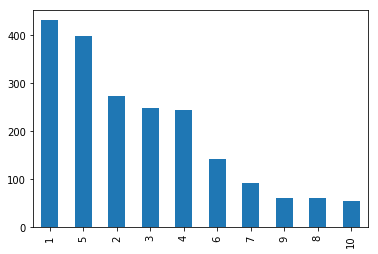

In [79]:
ax=data_raw['sector'].value_counts().plot(kind='bar')

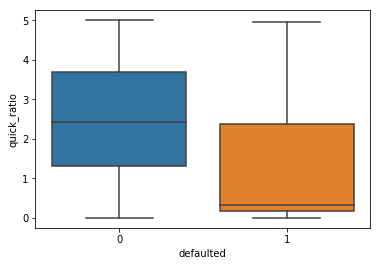

In [80]:
ax=sns.boxplot(x=data['defaulted'],y=data['quick_ratio'])

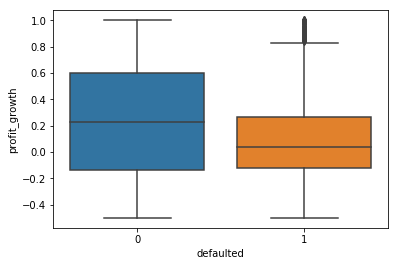

In [81]:
ax=sns.boxplot(x=data['defaulted'],y=data['profit_growth'])

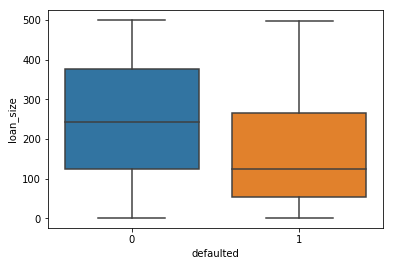

In [83]:
ax=sns.boxplot(x=data['defaulted'],y=data['loan_size'])

In [82]:
data.groupby(['defaulted',]).mean()

,Period,quick_ratio,profit_growth,management_turnover,loan_size,leverage_ratio
defaulted,,,,,,
0,2.011,2.49976,0.23677,0.25867,248.30312,0.48706
1,1.988,1.33237,0.11416,0.28009,167.79170,0.56184
